The path to the notebook is: /home/ucecabj/Desktop/MFI_git/MFI_class2D


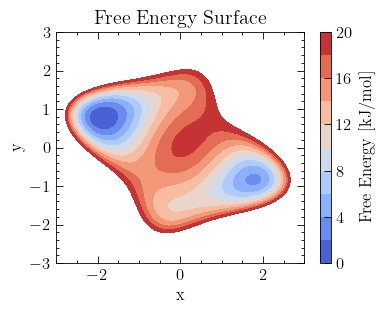

/home/ucecabj/Desktop/MFI_git/MFI_class2D


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import time
from importlib import reload

# Set the path to the notebook and the data folder (and figures folder if needed)
if 'path_notebook' not in globals(): path_notebook = os.getcwd()
print("The path to the notebook is:", path_notebook)

import MFI_lib2D as lib2
import MFI_class2D

# Set the plotting parameters
for _plt_parameters_ in [0]:
    from matplotlib import rc
    plt.rcParams.update({ "text.usetex": True, "font.family": "serif", "font.serif": ["Helvetica"], "font.size": 12, "axes.titleweight": "bold"})
    plw = 0.6  # width of (box line, tick line, ...)
    plt.rcParams.update({"axes.linewidth": plw, "figure.figsize": (4,3)}) 
    plt.rcParams.update({"xtick.top": True, "xtick.direction": "in", "xtick.major.width": plw, "xtick.minor.width": plw, "xtick.minor.visible": True, "xtick.major.size": 5})
    plt.rcParams.update({"ytick.right": True, "ytick.direction": "in", "ytick.major.width": plw, "ytick.minor.width": plw, "ytick.minor.visible": True, "ytick.major.size": 5})

grid = np.linspace(-3, 3, 100); 
X, Y = np.meshgrid(grid, grid)
inve_pot = 1.34549*X**4+1.90211*X**3*Y+3.92705*X**2*Y**2-6.44246*X**2-1.90211*X*Y**3+5.58721*X*Y+1.33481*X+1.34549*Y**4-5.55754*Y**2+0.904586*Y+18.5598
inve_pot = inve_pot - np.min(inve_pot)

plt.contourf(X, Y, inve_pot, levels=np.linspace(0, 20, 11), cmap='coolwarm'); plt.colorbar(label="Free Energy [kJ/mol]"); plt.xlabel("x"); plt.ylabel("y"); plt.title("Free Energy Surface"); plt.show()

[plX, plY, pl_min, pl_max, pl_n, pl_extra] = lib2.get_plumed_grid_2D(X, Y, [-4,-4], [4,4])

!pwd

### New Surface with 1 periodic CV and 1 non-periodic-CV

In [58]:
xmin = - np.pi
xmax = np.pi

ymin = 0
ymax = 100

x = np.linspace(xmin, xmax, 100)
y = np.linspace(ymin, ymax, 100)
X, Y = np.meshgrid(x, y)


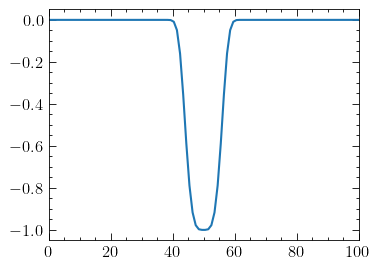

In [57]:
zz =  (np.zeros_like(y) 
       #+ np.exp(-y + 5) + np.exp(y - 95) \
        - np.exp( -0.5 * (y - 50)**4 / 30**2 )

)

plt.plot(y, zz)
plt.xlim(ymin, ymax)
plt.show()


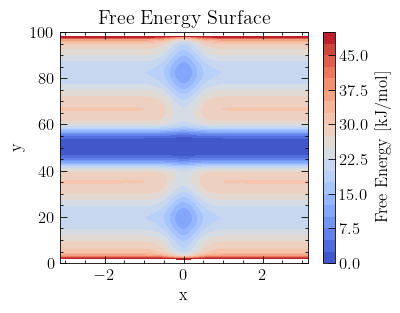

ready to show


In [206]:
Z = (np.zeros_like(X)
     +  5 * np.sin(0.2*Y + 0.8) 
     - 20 * np.exp(-0.6 * (Y-50)**4 / 50**2)
     - 10 * np.exp(-0.5 * (10*X**2 + 0.00002 * (Y-50)**2))
     + 10 * np.exp(-0.5 * (10*X**2 + 0.01 * (Y-50)**2) )
     
     + np.exp(-Y + 5) + np.exp(Y - 95) 
     )
Z = Z - np.min(Z)

plt.contourf(X, Y, Z, levels=np.linspace(0, 50, 21), cmap='coolwarm'); plt.colorbar(label="Free Energy [kJ/mol]"); plt.xlabel("x"); plt.ylabel("y"); plt.title("Free Energy Surface"); plt.show()

lib2.plot_3D_plotly(X, Y, Z, 0, 100, title="Complex surface", opacity=0.8)

### New Surface with multiple Minima

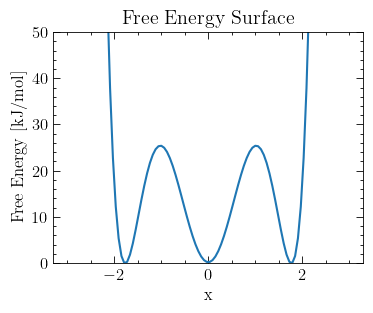

In [2]:
# grid = np.linspace(-10,10,100)
grid = np.linspace(-3,3,100)
a = 0.8
b = 5
c = 7.8
d = 7

y = d*(a*grid**6 - b*grid**4 + c*grid**2)
# y = 10*(0.05*grid**12 - 1*grid**4 + 1.2*grid**2)
# y = - 13*grid**4 + 48*grid**2 + 0.7*grid**6
y = y - np.min(y)

plt.plot(grid, y); 

plt.ylim(0, 50);
# plt.xlim(-3, 3);
plt.xlabel("x"); plt.ylabel("Free Energy [kJ/mol]"); plt.title("Free Energy Surface"); plt.show()


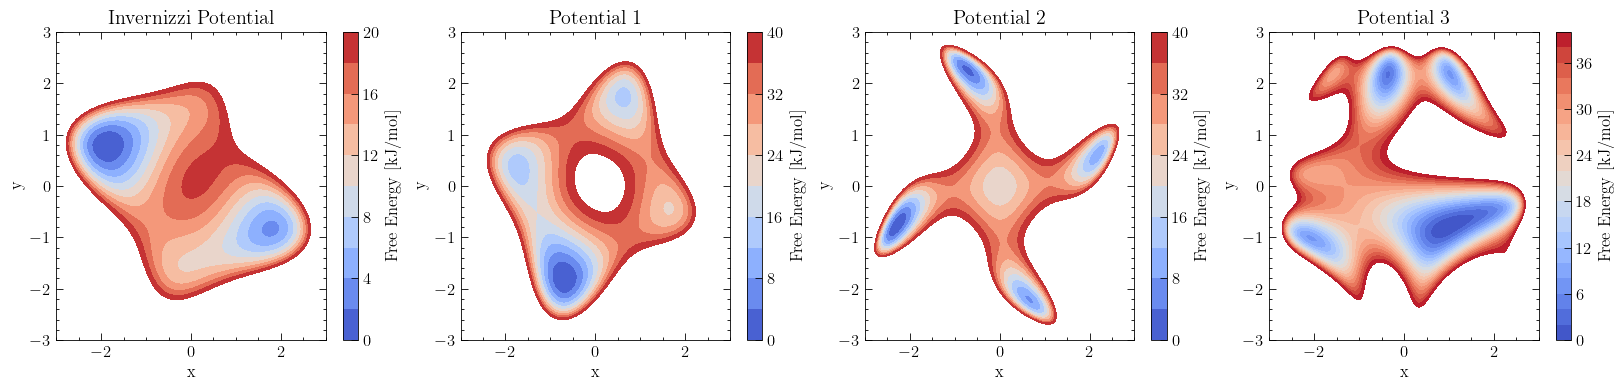

In [45]:
grid = np.linspace(-3, 3, 100); 
X, Y = np.meshgrid(grid, grid)
plt.figure(figsize=(20, 4))

# inve_pot = 1.34549*X**4+1.90211*X**3*Y+3.92705*X**2*Y**2-6.44246*X**2-1.90211*X*Y**3+5.58721*X*Y+1.33481*X+1.34549*Y**4-5.55754*Y**2+0.904586*Y+18.5598
inve_pot = + 1.34549*X**4 + 1.34549*Y**4 - 6.44246*X**2 - 5.55754*Y**2 
inve_pot += 1.90211*X**3*Y - 1.90211*X*Y**3 
inve_pot += 3.92705*X**2*Y**2 
inve_pot += 5.58721*X*Y 
inve_pot += 0.904586*Y + 1.33481*X + 18.5598
        
inve_pot = inve_pot - np.min(inve_pot)
plt.subplot(1,4,1); plt.contourf(X, Y, inve_pot, levels=np.linspace(0, 20, 11), cmap='coolwarm'); plt.colorbar(label="Free Energy [kJ/mol]"); plt.xlabel("x"); plt.ylabel("y"); plt.title("Invernizzi Potential"); 

ab_pot2 = 3.9*X**4 + 3.9*Y**4 - 19.2*X**2 - 19.2*Y**2 
ab_pot2 += 5.7*X**3*Y - 5.7*X*Y**3 
ab_pot2 += 12*X**2*Y**2 
ab_pot2 += -6*X*Y 
ab_pot2 += 2.7*Y + 3.6*X

ab_pot2 = 3.9*X**4 + 3.9*Y**4 - 19.2*X**2 - 19.2*Y**2 + 5.7*X**3*Y - 5.7*X*Y**3 + 12*X**2*Y**2 - 6*X*Y + 2.7*Y + 3.6*X


ab_pot2 = ab_pot2 - np.min(ab_pot2)
plt.subplot(1,4,2); plt.contourf(X, Y, ab_pot2, levels=np.linspace(0, 40, 11), cmap='coolwarm'); plt.colorbar(label="Free Energy [kJ/mol]"); plt.xlabel("x"); plt.ylabel("y"); plt.title("Potential 1")

ab_pot = 2.3*(0.8*(X**6 + Y**6) - 5*(X**4 + Y**4) + 7.8*(Y**2 + X**2) - X**5*Y + X*Y**5)
ab_pot += 3.7*(-X**3*Y + X*Y**3)
ab_pot += 20*X**2*Y**2 + 2.1*X**2 + 2.1*Y**2
ab_pot += 1*X*Y**2 + 1*X**2*Y + 24.70075155

ab_pot = 1.84*X**6 + 1.84*Y**6 - 11.5*X**4 - 11.5*Y**4 + 17.94*Y**2 + 17.94*X**2 - 2.3*X**5*Y + 2.3*X*Y**5 - 3.7*X**3*Y + 3.7*X*Y**3 + 20*X**2*Y**2 + 2.1*X**2 + 2.1*Y**2 + X**2*Y + X*Y**2 + 24.70075155


ab_pot = ab_pot - np.min(ab_pot)
plt.subplot(1,4,3); plt.contourf(X, Y, ab_pot, levels=np.linspace(0, 40, 11), cmap='coolwarm'); plt.colorbar(label="Free Energy [kJ/mol]"); plt.xlabel("x"); plt.ylabel("y"); plt.title("Potential 2")

ab_pot = np.exp(X-2)**5 + np.exp(-X-2)**5 + np.exp(Y-2)**5 + np.exp(-Y-2)**5
ab_pot += 13*np.sin(2*X*Y) + 17*np.sin(2*Y) + 0.137*X**4*Y**4

ab_pot = np.exp(X-2)**5 + np.exp(-X-2)**5 + np.exp(Y-2)**5 + np.exp(-Y-2)**5 + 13*np.sin(2*X*Y) + 17*np.sin(2*Y) + 0.137*X**4*Y**4
ab_pot_string = "exp(x-2)^5+exp(-x-2)^5+exp(y-2)^5+exp(-y-2)^5+13*sin(2*x*y)+17*sin(2*y)+0.137*x^4*y^4"

ab_pot = ab_pot - np.min(ab_pot)
plt.subplot(1,4,4); plt.contourf(X, Y, ab_pot, levels=np.linspace(0, 40, 21), cmap='coolwarm'); plt.colorbar(label="Free Energy [kJ/mol]"); plt.xlabel("x"); plt.ylabel("y"); plt.title("Potential 3")


plt.show()



In [64]:
np.deg2rad(180)

3.141592653589793

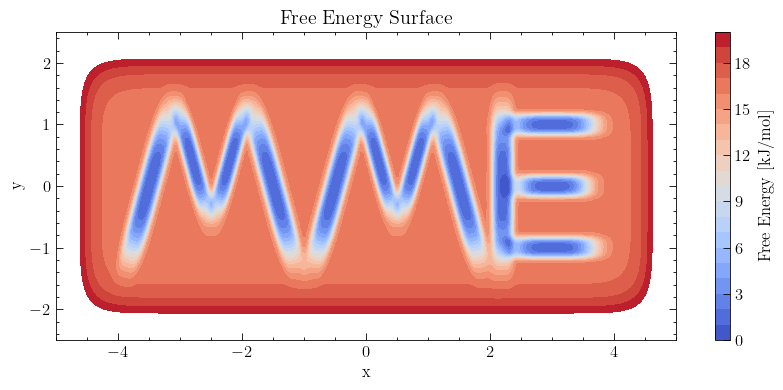

In [173]:
gridx = np.linspace(-5, 5, 300); 
gridy = np.linspace(-2.5, 2.5, 100)
X, Y = np.meshgrid(gridx, gridy)


# define functioin to create a 2D gaussians
def gaus2d(x=X, y=Y, x0=0, y0=0, xs=0.5, ys=0.5, A=1): return A * np.exp(-((x-x0)**2/(2*xs**2) + (y-y0)**2/(2*ys**2)))

# define function to create a 2D gaussian with covariance
def gaus2d(x=X, y=Y, x0=0, y0=0, xs=0.5, ys=0.5, A=1, cov=0, expx=2, expy=2): return - A * np.exp(-((x-x0)**expx/(2*xs**2) + (y-y0)**expy/(2*ys**2) + cov*(x-x0)*(y-y0)))

def rot_gaus(x=X, y=Y, x0=0, y0=0, xs=0.5, ys=0.5, A=1, theta=0, exp=2):
    theta = np.deg2rad(theta)
    X_rot = (X - x0) * np.cos(theta) + (Y - y0) * np.sin(theta)
    Y_rot = -(X - x0) * np.sin(theta) + (Y - y0) * np.cos(theta)
    return - A * np.exp(-0.5 * ((X_rot / xs) ** exp + (Y_rot / ys) ** exp))

ab_pot2 = 2E-13*X**20 + 0.05*Y**6

ab_pot2 += rot_gaus(A=15, x0=-3.5  , y0=0  , xs=0.15 , ys=1  , theta=-15, exp=4)
ab_pot2 += rot_gaus(A=15, x0=-2.8, y0=0.4, xs=0.12 , ys=0.7, theta=15 , exp=4)
ab_pot2 += rot_gaus(A=15, x0=-2.2 , y0=0.4, xs=0.12 , ys=0.7, theta=-15, exp=4)
ab_pot2 += rot_gaus(A=15, x0=-1.5   , y0=0  , xs=0.15 , ys=1  , theta=15 , exp=4)

ab_pot2 += rot_gaus(A=15, x0=-0.5  , y0=0  , xs=0.15 , ys=1  , theta=-15, exp=4)
ab_pot2 += rot_gaus(A=15, x0=0.2, y0=0.4, xs=0.12 , ys=0.7, theta=15 , exp=4)
ab_pot2 += rot_gaus(A=15, x0=0.8 , y0=0.4, xs=0.12 , ys=0.7, theta=-15, exp=4)
ab_pot2 += rot_gaus(A=15, x0=1.5   , y0=0  , xs=0.15 , ys=1  , theta=15 , exp=4)

ab_pot2 += rot_gaus(A=15, x0=2.2 , y0=0  , xs=0.15 , ys=1  , theta=0 , exp=4)
ab_pot2 += rot_gaus(A=15, x0=3   , y0=0  , xs=0.5 , ys=0.15  , theta=0 , exp=4)
ab_pot2 += rot_gaus(A=15, x0=3   , y0=1  , xs=0.6 , ys=0.15  , theta=0 , exp=4)
ab_pot2 += rot_gaus(A=15, x0=3   , y0=-1 , xs=0.6 , ys=0.15  , theta=0 , exp=4)

ab_pot2 = ab_pot2 - np.min(ab_pot2)

plt.figure(figsize=(10, 4))
plt.contourf(X, Y, ab_pot2, levels=np.linspace(0, 20, 21), cmap='coolwarm'); plt.colorbar(label="Free Energy [kJ/mol]"); plt.xlabel("x"); plt.ylabel("y"); plt.title("Free Energy Surface"); plt.show()
